In [2]:
# Fitness Plotter
# 3 encoding tests with 10 repeats, 100 iterations, and 8 roll outs took: 20 hours and 30 minutes

import csv
import sys
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set()

data/coparing_test_high-lift/indirect
data/coparing_test_high-lift/semi-indirect
data/coparing_test_high-lift/direct


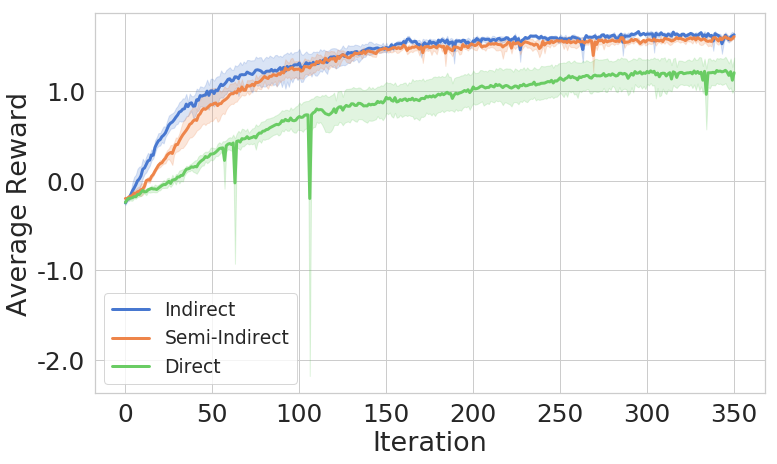

In [3]:
# Import data
dirname = "./../"
dirnames = []

# MORF
dirnames.append("data/coparing_test_high-lift/indirect")  # Indirect
dirnames.append("data/coparing_test_high-lift/semi-indirect")  # Semi-indirect
dirnames.append("data/coparing_test_high-lift/direct")  # Direct

# Alpha
# dirnames.append("ALPHA_encoding_test/RL_data_01081130.dat") #Indirect

for x in dirnames:
    # Append together
    print(x)
    filename = dirname + x + "/jobs1/RL_log.txt"
    MASTER = pd.read_csv(filename, sep='\t')

    #for i in range(1, 6):
    for i in range(1, 5):
        #print(i)
        filename = dirname + x + "/jobs" + str(i) + "/RL_log.txt"
        SLAVE = pd.read_csv(filename, sep='\t')
        MASTER = pd.concat([MASTER, SLAVE])
    
    sns.set("notebook",
            font_scale=2.25,
            rc={
                "lines.linewidth": 3,
                'figure.figsize': (12, 7)
            })
    sns.set_palette("muted")
    sns.set_style("whitegrid")
    
    normalized_MASTER=(MASTER-MASTER.min())/(MASTER.max()-MASTER.min()) # Problem they are not normalized together

    ax = sns.lineplot(x="iteration", y="fitness_arr_avg", data=MASTER)
    
ax.set(ylabel='Average Reward', xlabel='Iteration')
ax.legend(fontsize = 'x-small', loc='best', labels=["Indirect", "Semi-Indirect","Direct"])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))